In [0]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import statsmodels.api as sm

color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
train = pd.read_csv('http://api.covid19india.org/states_daily_csv/confirmed.csv')
train['date'] = pd.to_datetime(train['date'], format="%d-%b-%y")

train.head()

,date,TT,AN,AP,AR,AS,BR,CH,CT,DD,DL,DN,GA,GJ,HP,HR,JH,JK,KA,KL,LA,LD,MH,ML,MN,MP,MZ,NL,OR,PB,PY,RJ,SK,TG,TN,TR,UP,UT,WB,Unnamed: 39
0,2020-03-14,81,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0.0,0,0,0,1,0,3,0,1,1,0,12,0,0,NaN
1,2020-03-15,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0.0,0,0,0,0,0,1,0,2,0,0,1,0,0,NaN
2,2020-03-16,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,NaN,0,0,1,0,1,0,0,1,0,0,0,1,0,NaN
3,2020-03-17,11,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0.0,0,0,0,0,0,0,0,1,0,0,2,0,1,NaN
4,2020-03-18,37,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0.0,0,0,1,1,0,3,0,8,1,0,2,1,0,NaN


In [0]:
cols = ['AN','AP',	'AR',	'AS',	'BR',	'CH',	'CT',	'DD',	'DL',	'DN',	'GA',	'GJ',	'HP',	'HR',	'JH', 'JK',	'KA',	'KL',	'LA',	'LD',	'MH',	'ML',	'MN',	'MP',	'MZ',	'NL',	'OR',	'PB',	'PY',	'RJ',	'SK',	'TG',	'TN',	'TR',	'UP',	'UT',	'WB']
train.drop(cols, axis=1, inplace=True)

In [4]:
train.head()

,date,TT,Unnamed: 39
0,2020-03-14,81,NaN
1,2020-03-15,27,NaN
2,2020-03-16,15,NaN
3,2020-03-17,11,NaN
4,2020-03-18,37,NaN


In [5]:
train_df = train
train_df['year'] = train['date'].dt.year
train_df['month'] = train['date'].dt.month
train_df['day'] = train['date'].dt.dayofyear
train_df['weekday'] = train['date'].dt.weekday

train_df.head()

,date,TT,Unnamed: 39,year,month,day,weekday
0,2020-03-14,81,NaN,2020,3,74,5
1,2020-03-15,27,NaN,2020,3,75,6
2,2020-03-16,15,NaN,2020,3,76,0
3,2020-03-17,11,NaN,2020,3,77,1
4,2020-03-18,37,NaN,2020,3,78,2


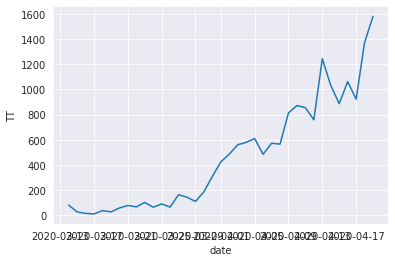

In [6]:
sns.lineplot(x="date", y="TT",legend = 'full' , data=train_df)

In [7]:
train_df = train_df.set_index('date')
train_df['TT'] = train_df['TT'].astype(float)

train_df.head()

,TT,Unnamed: 39,year,month,day,weekday
date,,,,,,
2020-03-14,81.0,NaN,2020,3,74,5
2020-03-15,27.0,NaN,2020,3,75,6
2020-03-16,15.0,NaN,2020,3,76,0
2020-03-17,11.0,NaN,2020,3,77,1
2020-03-18,37.0,NaN,2020,3,78,2


<Figure size 432x288 with 0 Axes>

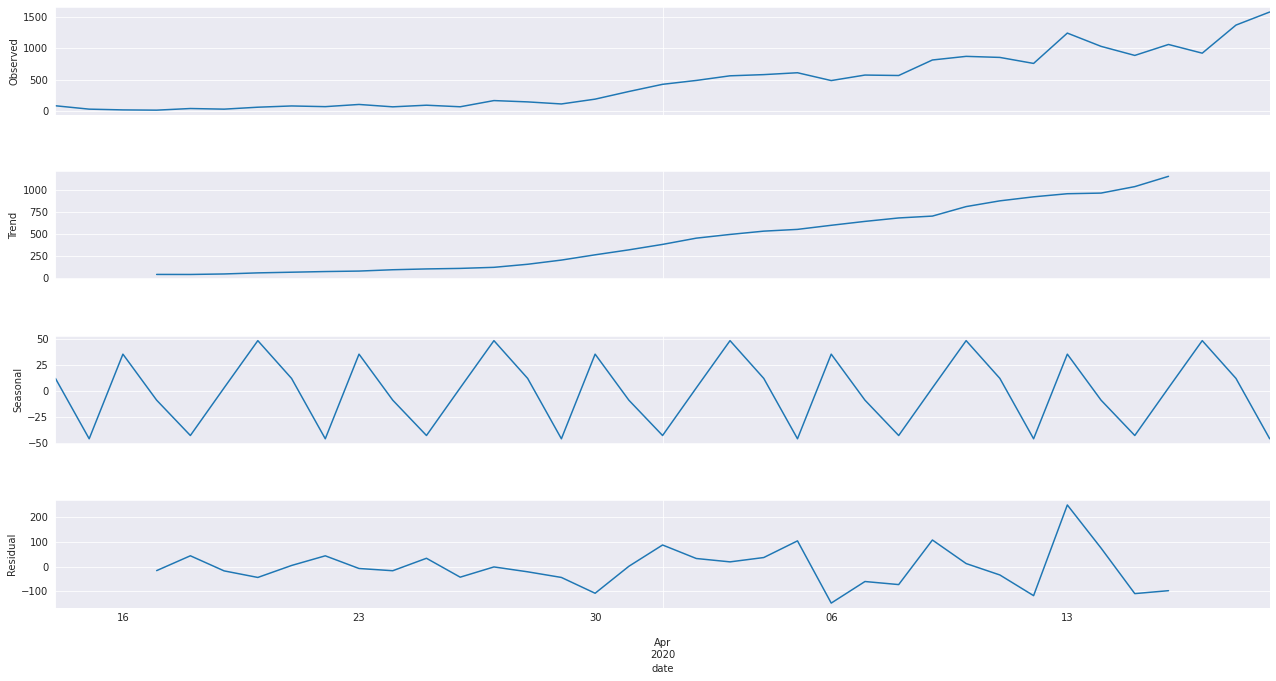

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df['TT'], model='additive')

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(20, 12)

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 15, cutoff = 0.01):
  rolmean = timeseries.rolling(window).mean()
  rolstd = timeseries.rolling(window).std()
  fig = plt.figure(figsize=(12, 8))
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC',)
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  pvalue = dftest[1]
  if pvalue < cutoff:
      print('p-value = %.4f. The series is likely stationary.' % pvalue)
  else:
      print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
  
  print(dfoutput)

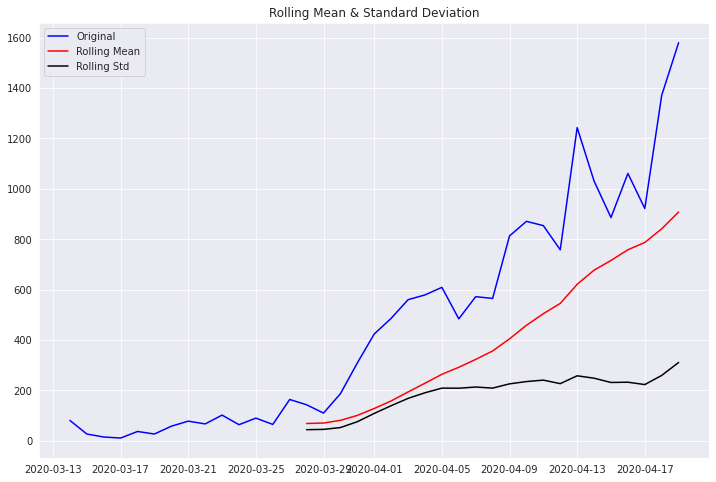

Results of Dickey-Fuller Test:
p-value = 0.9778. The series is likely non-stationary.
Test Statistic                  0.310669
p-value                         0.977829
#Lags Used                      9.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [10]:
test_stationarity(train_df['TT'])

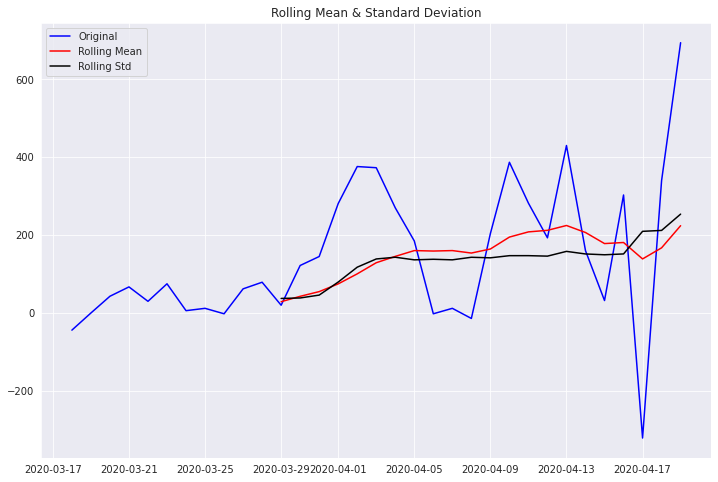

Results of Dickey-Fuller Test:
p-value = 0.3427. The series is likely non-stationary.
Test Statistic                 -1.877549
p-value                         0.342695
#Lags Used                      4.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [11]:
first_diff = train_df.TT - train_df.TT.shift(4)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

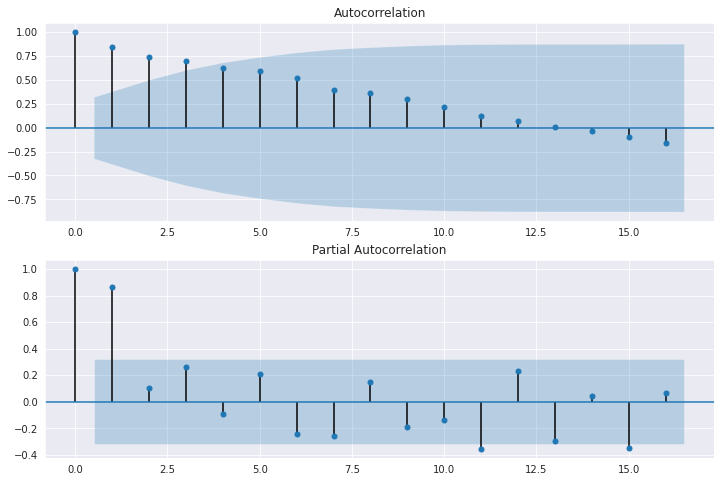

In [12]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.TT, ax=ax1, ) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df.TT, ax=ax2)# , lags=40

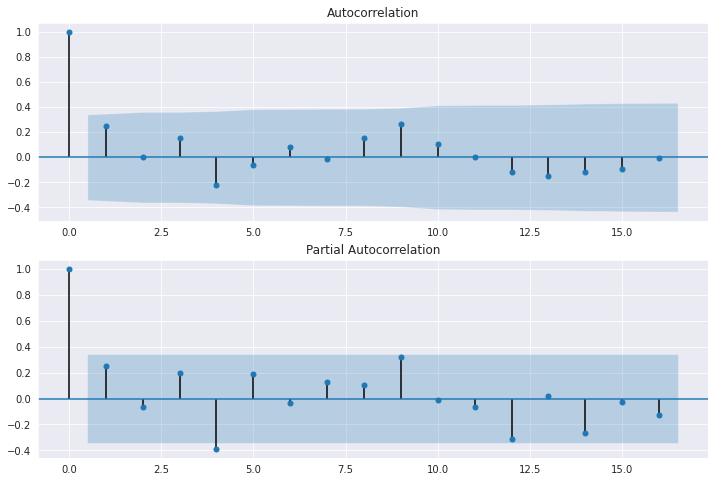

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, ax=ax2)

In [14]:
# I = 4 AR = 2,3 MA = AR-1
arima_mod6 = sm.tsa.ARIMA(train_df.TT, (3,2,1)).fit(disp=False)
print(arima_mod6.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D2.TT   No. Observations:                   35
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -221.245
Method:                       css-mle   S.D. of innovations            125.599
Date:                Mon, 20 Apr 2020   AIC                            454.489
Time:                        17:51:09   BIC                            463.821
Sample:                    03-16-2020   HQIC                           457.711
                         - 04-19-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.8587      1.291      2.215      0.035       0.329       5.388
ar.L1.D2.TT    -0.3994      0.182     -2.193      0.036      -0.756      -0.042
ar.L2.D2.TT    -0.2600      0.219     -1.189    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


NormaltestResult(statistic=2.384773215039154, pvalue=0.30349607302767834)


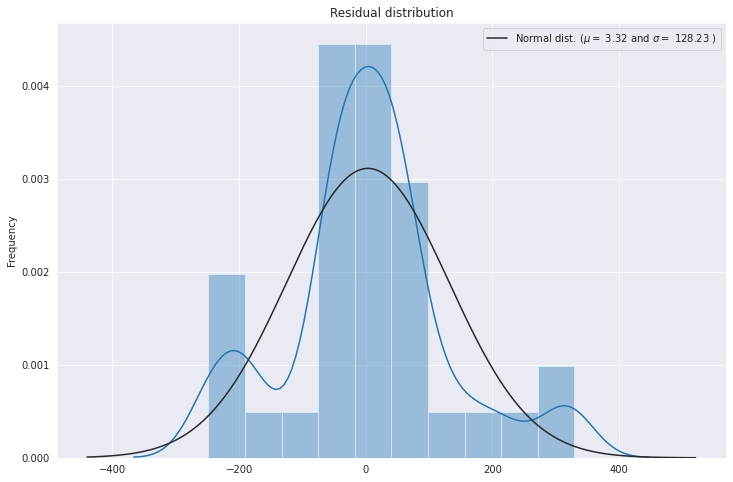

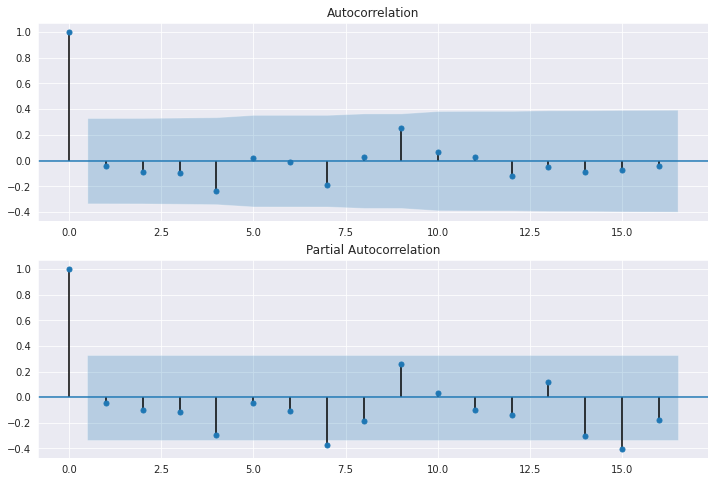

In [15]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_mod6.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, ax=ax2)

In [16]:
sarima_mod6 = sm.tsa.statespace.SARIMAX(train_df.TT, trend='n', order=(5,2,1)).fit()
print(sarima_mod6.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                     TT   No. Observations:                   37
Model:               SARIMAX(5, 2, 1)   Log Likelihood                -221.395
Date:                Mon, 20 Apr 2020   AIC                            456.791
Time:                        17:51:11   BIC                            467.678
Sample:                    03-14-2020   HQIC                           460.549
                         - 04-19-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4927      0.344     -1.434      0.151      -1.166       0.181
ar.L2         -0.4504      0.463     -0.972      0.331      -1.358       0.458
ar.L3         -0.2900      0.348     -0.833      0.4

NormaltestResult(statistic=10.174028165011183, pvalue=0.006176434705363058)


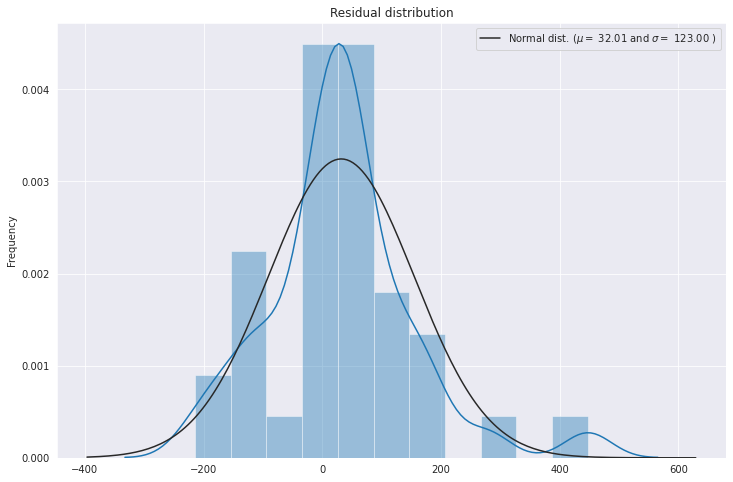

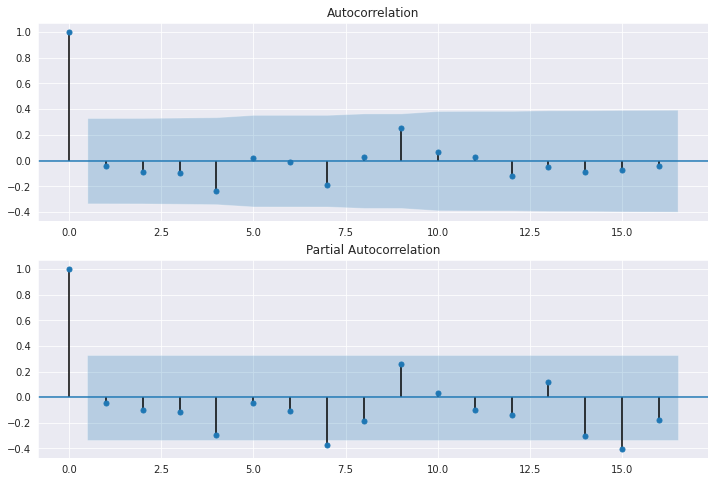

In [17]:
resid = sarima_mod6.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, ax=ax2)

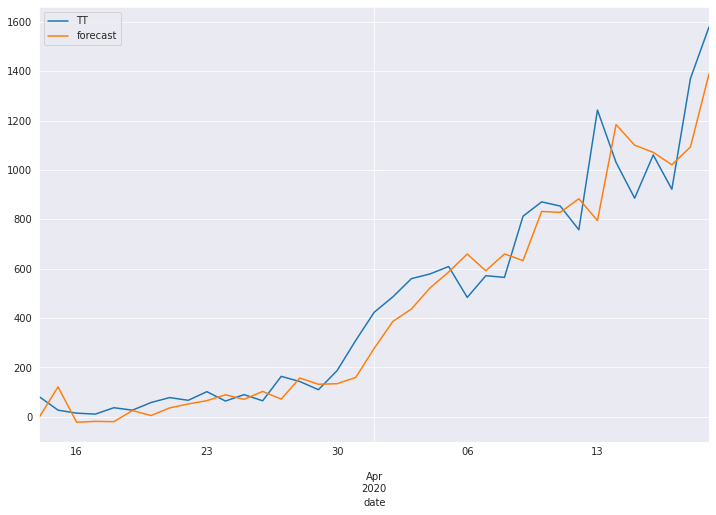

In [18]:
import datetime
from datetime import timedelta

start_index = '14-Mar-20'
end_index = '27-Apr-20'

train_df['forecast'] = sarima_mod6.predict(start= start_index,end = end_index,dynamic= False,)  

train_df[start_index:][['TT', 'forecast']].plot(figsize=(12, 8))

In [0]:
r = sarima_mod6.predict(start= datetime.date.today() ,end = datetime.date.today()+timedelta(days=7) ,dynamic= False,)

In [135]:
r

2020-04-20    1434.657666
2020-04-21    1502.628901
2020-04-22    1477.114125
2020-04-23    1547.764976
2020-04-24    1724.741727
2020-04-25    1777.934298
2020-04-26    1834.811774
2020-04-27    1883.364993
Freq: D, dtype: float64

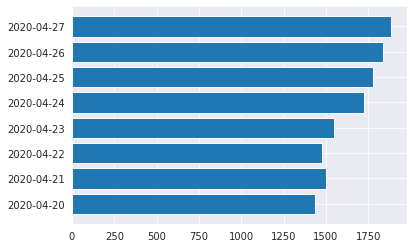

In [136]:
bar = plt.barh(r.index,r,animated=True,snap= True)

AttributeError: ignored